In [6]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import np_utils
import tensorflow as tf
from keras.preprocessing.image import load_img


ImportError: cannot import name 'load_img' from 'keras.preprocessing.image' (/opt/anaconda3/lib/python3.9/site-packages/keras/preprocessing/image.py)

In [3]:
from keras.preprocessing.image import load_img

ImportError: cannot import name 'load_img' from 'keras.preprocessing.image' (/opt/anaconda3/lib/python3.9/site-packages/keras/preprocessing/image.py)

In [5]:
p = Path("./smallDataset/")
dirs = p.glob("*")

image_data = []
labels = []
labels_dict = {}
c = 0;
for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    labels_dict[label] = c
    c+=1
    
    cnt = 0
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(28,28))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
        cnt+=1
    print(cnt)

0


AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'

In [11]:
X = np.array(image_data)
Y = np.array(labels)

In [ ]:
from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)
X = X/255.0


In [ ]:
# def drawImg(img, label):
#     print(img.shape)
#     plt.imshow(img, cmap = 'gray')
#     plt.show()

In [ ]:
# for i in range(10):
#     r= np.random.randint(5000)
#     drawImg(X[r],Y[r])

In [ ]:
split = int(X.shape[0]*.8)
X_ = np.array(X)
Y_ = np.array(Y)

X = X_[:split,:]
Y = Y_[:split]
XTest = X_[split:,:]
YTest = Y_[split:]
print(X.shape)
Y = np_utils.to_categorical(Y)
YTest = Y_[split:]
print(Y.shape)

# print(XTest.shape)

In [ ]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation = 'relu', input_shape=(28,28,3)))
model.add(Convolution2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5), activation = 'relu'))
model.add(Convolution2D(8,(5,5), activation = 'relu'))
model.add(Flatten())
model.add(Dense(36,activation = 'softmax'))
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
hist = model.fit(X, Y, epochs = 20, shuffle = True, batch_size = 256, validation_split = 0.20)

In [6]:
# plt.figure(0)
plt.style.use("seaborn")
plt.plot(hist.history['loss'],label = "loss")
# plt.plot(hist.history['val_loss'], 'b', label = "value loss")
plt.savefig("CNN loss")
plt.show()
plt.plot(hist.history['accuracy'],'red', label= 'Accuracy')
# plt.plot(hist.history['val_accuracy'], 'black', label = 'Value Accuracy')
plt.savefig("CNN acc")
plt.show()

NameError: name 'hist' is not defined

In [7]:
YPredict = model.predict(XTest)
YPredict_train = model.predict(X)
# print(YPredict.shape)

# print(Y.shape[0])
# print(YTest.shape)
# print(YPredict)
YTest.shape
# Y.shape

NameError: name 'model' is not defined

In [8]:

s = 0

In [60]:
array = np.zeros((36,36), dtype = np.int64)

for i in range(YPredict.shape[0]):
    idx = np.argmax(YPredict[i])
    if(YTest[i] == idx):
        s+=1
#     l = label

    array[YTest[i]][idx]+=1

In [61]:
acc = s/YTest.shape[0]
print(acc)

0.9258289703315882


In [62]:
s = 0
for i in range(Y.shape[0]):
    idx = np.argmax(YPredict_train[i])
    if Y[i][0] == idx :
        s+=1
    

In [63]:
acc = s/Y.shape[0]
print(acc)

0.0058951965065502186


In [64]:
import seaborn as sns

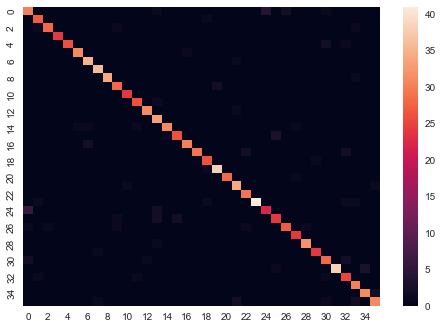

In [65]:
hm = sns.heatmap(array)
fig = hm.get_figure()
fig.savefig("CNN heatmap")